# United States Hate Crime Analysis

### The following Script Contains:
#### 01. Importing Libraries and Data and Modifying Columns
#### 02. Elbow Technique
#### 03. K-means Clustering

### 01. Importing Libraries and Data and Modifying Columns

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path and import data
path = r'C:\Users\kenzy\OneDrive\Desktop\Data Analytics Course 2.0\Advanced Analytics & Dashboard Design (Original)\10-2024 American Hate Crime'
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'new_hate_crime_wrangled.csv'))

In [4]:
# Check import
df.shape

(180293, 10)

In [5]:
df.head()

,Unnamed: 0,incident_year,state_abbr,state_name,region_name,offender_count,offender_race,victim_count,offense_type,prejudice
0,0,1991,AR,Arkansas,South,1,White,1,Intimidation,Anti-Black or African American
1,1,1991,AR,Arkansas,South,1,Black or African American,1,Simple Assault,Anti-White
2,2,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,Anti-Black or African American
3,3,1991,AR,Arkansas,South,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White
4,4,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,Anti-White


In [6]:
# Drop unnecessary columns (non-numerical data cannot be used)
df = df.drop(['Unnamed: 0', 'state_abbr', 'state_name', 'region_name', 'offender_race', 'offense_type', 'prejudice'],axis = 1)

In [7]:
# Confirm columns dropped
df.head()

,incident_year,offender_count,victim_count
0,1991,1,1
1,1991,1,1
2,1991,1,1
3,1991,1,2
4,1991,1,1


### 02. Elbow Technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

C:\Users\kenzy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kenzy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\kenzy\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kenzy\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\kenzy\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [10]:
# Check scores
score

[-11185257.015391529,
 -3384453.0665440653,
 -1876439.8742844497,
 -1245683.87908724,
 -1054482.3303185042,
 -853473.9414341939,
 -779031.7243444528,
 -683380.891545288,
 -667449.4489029051]

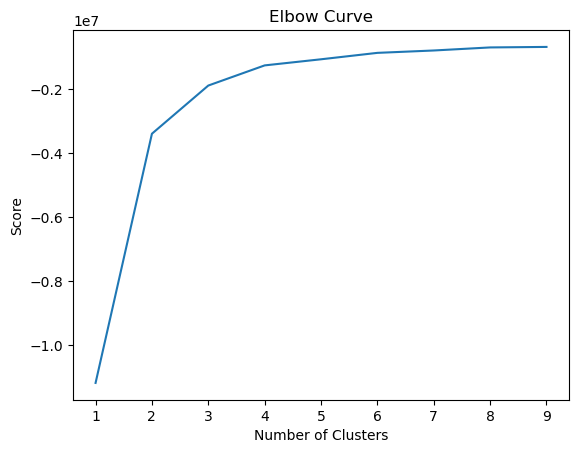

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### In this example, there is a large jump between 2 and 3 on the x-axis and a smaller jump between 3 and 4, after this the curve straightens out. With this knowledge, we can determine that the optimal amount of clusters for this data is 4. 

### 03. K-Means Clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_init = 1) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4, n_init=1)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

In [15]:
# Check for new cluster column
df.head()

,incident_year,offender_count,victim_count,clusters
0,1991,1,1,3
1,1991,1,1,3
2,1991,1,1,3
3,1991,1,2,3
4,1991,1,1,3


In [16]:
# Check value counts for each cluster
df['clusters'].value_counts()

clusters
1    64726
2    61643
3    52859
0     1065
Name: count, dtype: int64

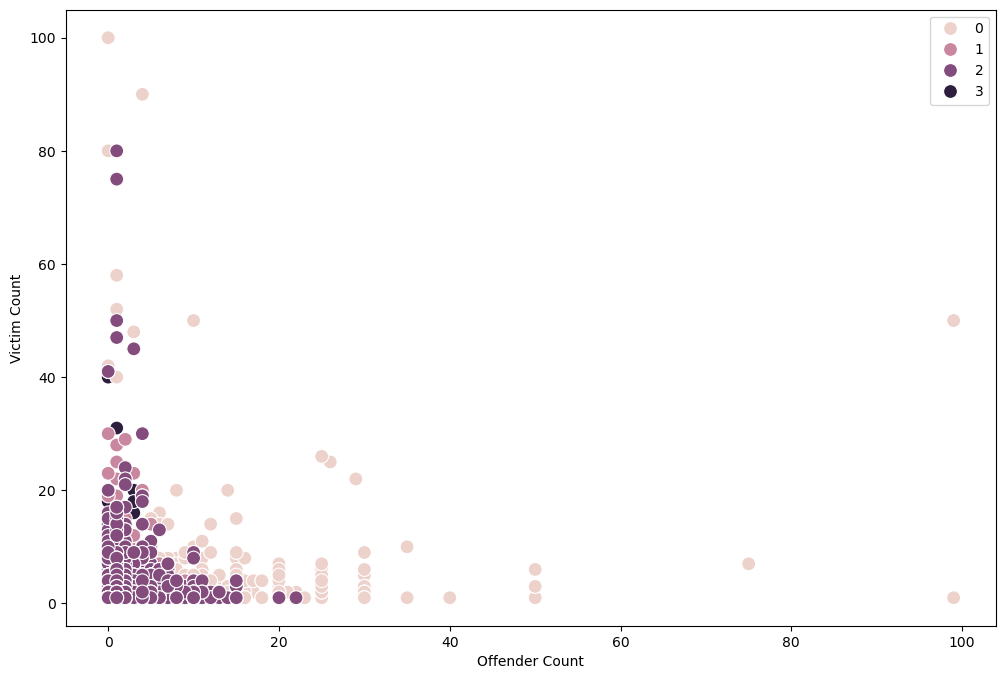

In [17]:
# Plot the clusters for the "Offender Count" and "Victim Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['offender_count'], y=df['victim_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Offender Count') # Label x-axis.
plt.ylabel('Victim Count') # Label y-axis.
plt.show()

##### This plot does not demonstrate if there is a linear relationship between the two variables well. As we know from previous analysis, there is a limited positive relationship between these variables. The data is mostly clustered in the left of the graph. Many data points for lower victim and offender counts belong to cluster 2. 

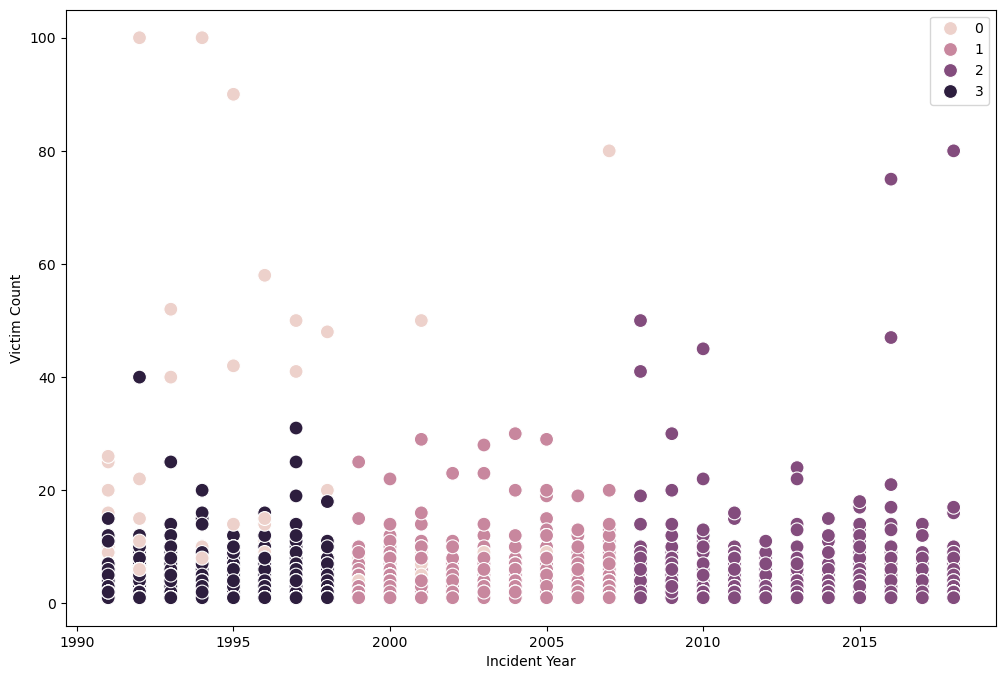

In [18]:
# Plot the clusters for the "Incident year" and "Victim Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['incident_year'], y=df['victim_count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Incident Year') 
plt.ylabel('Victim Count') 
plt.show()

##### This gives a frequency of victims per year. The algorithm seems to have sorted the victim counts into clusters by the year they took place in. 

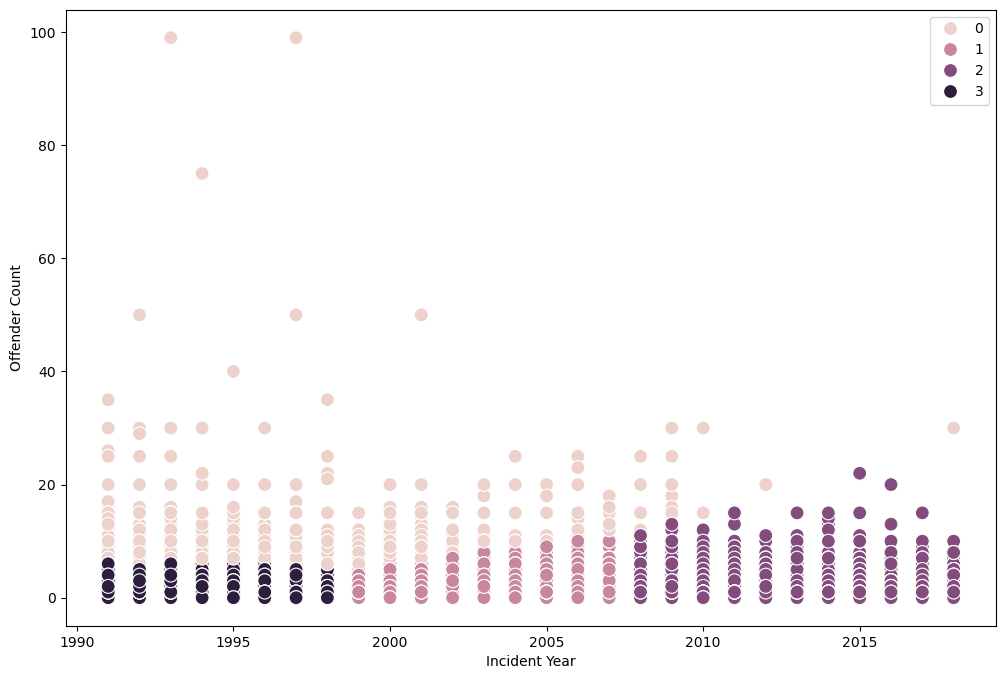

In [19]:
# Plot the clusters for the "Incident year" and "Offender Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['incident_year'], y=df['offender_count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Incident Year') 
plt.ylabel('Offender Count') 
plt.show()

##### This plot appears similarily to the one above but instead for offenders

In [20]:
# Check for insights in the clusters by creating groups to analyze further
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [21]:
# Group by clusters and check descriptive factors
df.groupby('clusters').agg({'offender_count':['mean', 'median'], 
                         'victim_count':['mean', 'median'], 
                         'incident_year':['mean', 'median']})

offender_count        victim_count        incident_year        
                   mean median         mean median          mean  median
clusters                                                                
0             10.866667    9.0     2.784038    1.0   1996.408451  1996.0
1              0.920542    1.0     1.229058    1.0   2002.901971  2003.0
2              0.935954    1.0     1.239703    1.0   2012.716902  2013.0
3              0.952250    1.0     1.233016    1.0   1994.796761  1995.0

##### From this information we can learn that each cluster's groupings have at least 1 offender per data point. Each cluster also has similar victim counts. The main difference between the groupings is in the incident_year: Cluster 0 focuses on data from mid 2000s, cluster 1 focuses on earlier data in the 1990s, cluster 2 focuses on data in the 2010s, and cluster 3 focuses on late 90s to early 2000s data.

##### We could look further into these yearly groupings to see trends on if hate increased or decreased with in certain clusters and if there may be reasons behind these results. It would also be interesting to look into presidential periods to see if hate crimes increased or decreased during specific administration periods. 

In [23]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cluster_data.csv'))